<h1>Preamble: </h1>

In [1]:
# Importing all needed modules for this task
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

The first part of this notebook will focus on opening the images with no adjustments.


[ WARN:0@0.472] global loadsave.cpp:248 findDecoder imread_('COTS_Img/boots_colour.jpeg'): can't open/read file: check file path/integrity
[ WARN:0@0.473] global loadsave.cpp:248 findDecoder imread_('COTS_Img/digital_natives_book_colour.jpeg'): can't open/read file: check file path/integrity
[ WARN:0@0.473] global loadsave.cpp:248 findDecoder imread_('COTS_Img/dslr_colour.jpeg'): can't open/read file: check file path/integrity
[ WARN:0@0.473] global loadsave.cpp:248 findDecoder imread_('COTS_Img/headphones_colour.jpeg'): can't open/read file: check file path/integrity
[ WARN:0@0.473] global loadsave.cpp:248 findDecoder imread_('COTS_Img/volcano_colour.jpeg'): can't open/read file: check file path/integrity


Failed to load boots_colour.jpeg
Failed to load digital_natives_book_colour.jpeg
Failed to load dslr_colour.jpeg
Failed to load headphones_colour.jpeg
Failed to load volcano_colour.jpeg


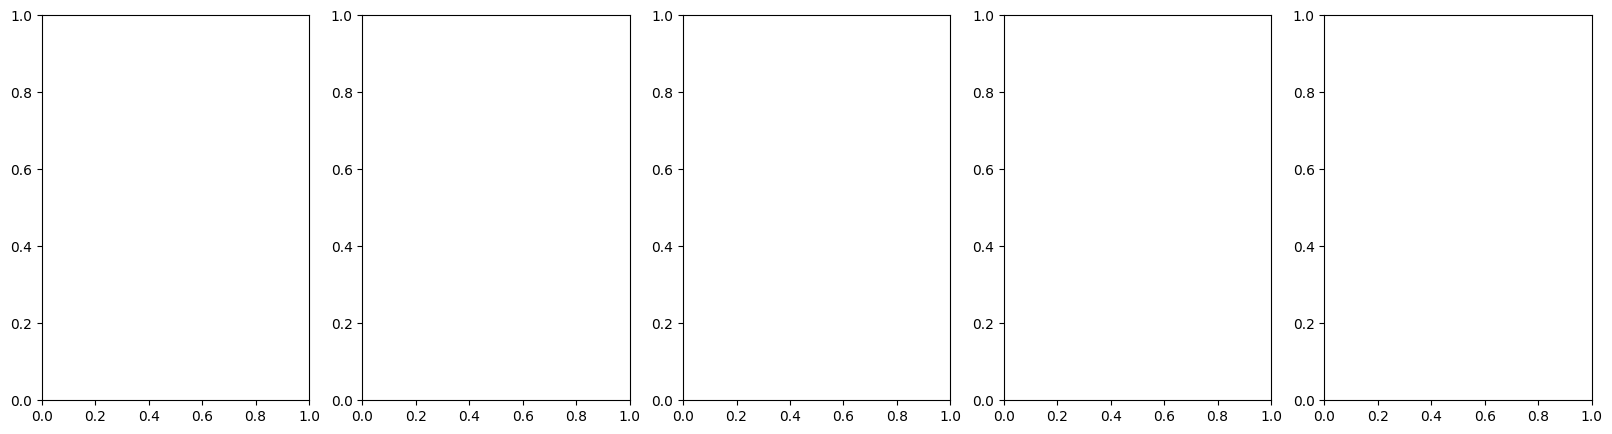

In [2]:
# Define the path to the image folder relative to the notebook
image_folder = 'COTS_Img'

# List of image filenames
image_files = [
    'boots_colour.jpeg',
    'digital_natives_book_colour.jpeg',
    'dslr_colour.jpeg',
    'headphones_colour.jpeg',
    'volcano_colour.jpeg'
]

# Load and display the images
images = []

for image_file in image_files:
    img_path = os.path.join(image_folder, image_file)
    img = cv2.imread(img_path)
    if img is not None:
        # Convert BGR (OpenCV default) to RGB (matplotlib default)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append((image_file, img_rgb))  # Append as a tuple (filename, image)
    else:
        print(f"Failed to load {image_file}")

# Display the images
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for ax, (image_file, img) in zip(axes, images):
    ax.imshow(img)
    ax.set_title(image_file)
    ax.axis('off')

plt.show()


<h1>Brightness variation: </h1>


In [3]:
# Ensure the 'brightness' directory exists
os.makedirs('brightness', exist_ok=True)

# Function to adjust brightness
def adjust_brightness(image, brightness):
    # Clip the values to be in the valid range [0, 255]
    bright_img = np.clip(image + brightness, 0, 255).astype(np.uint8)
    return bright_img

# Brightness levels to apply
brightness_levels = [-100, -50, 0, 50, 100]

# Generate and display augmented images
for image_file, img in images:
    fig, axes = plt.subplots(1, len(brightness_levels) + 1, figsize=(20, 5))
    fig.suptitle(f'Brightness Variation for {image_file}')
    
    # Display original image
    axes[0].imshow(img)
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    # Generate augmented images
    for ax, level in zip(axes[1:], brightness_levels):
        augmented_img = adjust_brightness(img, level)
        ax.imshow(augmented_img)
        ax.set_title(f'Brightness {level}')
        ax.axis('off')
        
        # Save the augmented image
        output_filename = f'brightness/brightness_{level}_{image_file}'
        plt.imsave(output_filename, augmented_img)
    
    plt.show()


The code first makes sure that the augmented photographs will be kept in a directory called "brightness." Then, to change the brightness levels of images, the adjust_brightness() function is defined. It accepts a picture and a brightness parameter as inputs, adds the given value to each pixel to modify brightness, and makes sure the values of the pixels stay within the allowed range of 0 to 255. The modified image is returned by the function. The next step is to establish a list of brightness levels, which go from -100 to 100. The brightness variations that will be applied to the photos are represented by this list. 

Lastly, a collection of augmented images is created for each image by modifying the brightness levels in accordance with the specified list. These enhanced pictures are shown next to the original picture so that various brightness levels can be visually compared.

The final adjustments to the brightness levels, for example, will have an impact on how the photographs appear visually. Brightness will increase with positive numbers and decrease with negative ones. The image will remain unaltered if the value is 0. The magnitude of the value determines how much of a change there is. Changes will be more noticeable at higher levels, and less noticeable at lower values. It is possible to fine-tune the brightness of photographs to obtain desired visual effects by experimenting with different values.

<h1>Contrast Variation:</h1>

In [4]:
# Ensure the 'contrast' directory exists
os.makedirs('contrast', exist_ok=True)

# Function to adjust contrast
def adjust_contrast(image, contrast):
    # Calculate the midpoint value
    midpoint = 128
    # Apply contrast adjustment
    contrast_img = np.clip(midpoint + contrast * (image - midpoint), 0, 255).astype(np.uint8)
    return contrast_img

# Contrast levels to apply
contrast_levels = [0.5, 0.75, 1.0, 1.25, 1.5]

# Generate and display augmented images
for image_file, img in images:
    fig, axes = plt.subplots(1, len(contrast_levels) + 1, figsize=(20, 5))
    fig.suptitle(f'Contrast Variation for {image_file}')
    
    # Display original image
    axes[0].imshow(img)
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    # Generate augmented images
    for ax, level in zip(axes[1:], contrast_levels):
        augmented_img = adjust_contrast(img, level)
        ax.imshow(augmented_img)
        ax.set_title(f'Contrast {level}')
        ax.axis('off')
        
        # Save the augmented image
        output_filename = f'contrast/contrast_{level}_{image_file}'
        plt.imsave(output_filename, augmented_img)
    
    plt.show()

The code starts by ensuring that augmented photographs will be stored in a directory called "contrast." Then, it defines the adjust_contrast() function to alter the contrast levels of images. This function accepts an image and a contrast parameter as inputs. It calculates the midpoint value (which is set to 128) and applies a contrast adjustment formula to each pixel. The formula enhances or reduces contrast based on the given contrast parameter. The modified image is then returned by the function. Following this, a list of contrast levels ranging from 0.5 to 1.5 is established. These levels represent the variations in contrast that will be applied to the photos.

Lastly, a set of augmented images is generated for each image by adjusting the contrast levels according to the specified list. These enhanced images are displayed alongside the original image, allowing for visual comparison of different contrast levels. The higher the contrast value given, the more "distorted" the image appears and the more certain colours (like the large pink found for the volcano object) pop out.

<h1>Saturation Variation:</h1>

In [5]:
# Ensure the 'saturation' directory exists
os.makedirs('saturation', exist_ok=True)

# Function to adjust saturation using first principles
def adjust_saturation(image, saturation_factor):
    saturated_img = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Convert RGB to HSV
            r, g, b = image[i, j] / 255.0
            cmax = max(r, g, b)
            cmin = min(r, g, b)
            delta = cmax - cmin
            
            # Compute saturation value
            if cmax != 0:
                s = delta / cmax
            else:
                s = 0
                
            # Adjust saturation
            s *= saturation_factor
            
            if s == 0:
                r, g, b = 0, 0, 0
            else:
                # Compute RGB values
                h = 60 * (((r - g) / delta) % 6) if cmax == r else \
                    60 * (((g - b) / delta) + 2) if cmax == g else \
                    60 * (((b - r) / delta) + 4)
                x = s * (1 - abs((h / 60) % 2 - 1))
                m = cmax - s
                
                if 0 <= h < 60:
                    r, g, b = cmax, x, 0
                elif 60 <= h < 120:
                    r, g, b = x, cmax, 0
                elif 120 <= h < 180:
                    r, g, b = 0, cmax, x
                elif 180 <= h < 240:
                    r, g, b = 0, x, cmax
                elif 240 <= h < 300:
                    r, g, b = x, 0, cmax
                elif 300 <= h < 360:
                    r, g, b = cmax, 0, x
                    
                r, g, b = (r + m) * 255, (g + m) * 255, (b + m) * 255
            
            saturated_img[i, j] = [r, g, b]
    
    return saturated_img.astype(np.uint8)

# Saturation levels to apply
saturation_levels = [-0.5, 0.5, 1.5, 3, 4.5]

# Generate and display augmented images
for image_file, img in images:
    fig, axes = plt.subplots(1, len(saturation_levels) + 1, figsize=(20, 5))
    fig.suptitle(f'Saturation Variation for {image_file}')
    
    # Display original image
    axes[0].imshow(img)
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    # Generate augmented images
    for ax, level in zip(axes[1:], saturation_levels):
        augmented_img = adjust_saturation(img, level)
        ax.imshow(augmented_img)
        ax.set_title(f'Saturation {level}')
        ax.axis('off')
        
        # Save the augmented image
        output_filename = f'saturation/saturation_{level}_{image_file}'
        plt.imsave(output_filename, augmented_img)
    
    plt.show()

The code starts by ensuring that augmented photographs will be stored in a directory called "saturation." Then, it defines the adjust_saturation() function, which adjusts the saturation of images based on the given saturation factor. This function operates on the RGB color space and computes the saturation of each pixel using first principles of color theory. It converts the RGB values to HSV (Hue, Saturation, Value) color space, adjusts the saturation component, and then converts back to RGB. The modified image is returned by the function. Following this, a list of saturation levels ranging from -0.5 to 4.5 is established. These levels represent the variations in saturation that will be applied to the photos.

Lastly, a set of augmented images is generated for each image by adjusting the saturation levels according to the specified list. These enhanced images are displayed alongside the original image, allowing for visual comparison of different saturation levels.

<h1>Rotation:</h1>

In [6]:
# Ensure the 'rotation' directory exists
os.makedirs('rotation', exist_ok=True)

# Define function to rotate image using first principles
def rotate_image(image, angle):
    angle_rad = np.deg2rad(angle)
    rows, cols, _ = image.shape
    center_row, center_col = rows // 2, cols // 2
    
    rotated_image = np.zeros_like(image)
    
    for i in range(rows):
        for j in range(cols):
            y = i - center_row
            x = j - center_col
            
            new_x = int(center_col + x * np.cos(angle_rad) - y * np.sin(angle_rad))
            new_y = int(center_row + x * np.sin(angle_rad) + y * np.cos(angle_rad))
            
            if 0 <= new_x < cols and 0 <= new_y < rows:
                rotated_image[new_y, new_x] = image[i, j]
    
    return rotated_image

# Rotation angles to apply
angles = [-90, -45, 0, 45, 90]

# Generate augmented images with rotation
for image_file, img in images:
    for angle in angles:
        rotated_img = rotate_image(img, angle)
        
        # Save the rotated image
        output_filename = f'rotation/rotation_{angle}_{image_file}'
        plt.imsave(output_filename, rotated_img)

# Display the augmented images
fig, axes = plt.subplots(len(angles), len(images), figsize=(20, 20))

for i, angle in enumerate(angles):
    for j, (image_file, img) in enumerate(images):
        ax = axes[i, j]
        ax.imshow(plt.imread(f'rotation/rotation_{angle}_{image_file}'))
        ax.set_title(f"Angle: {angle}")
        ax.axis('off')

plt.show()

ValueError: Number of columns must be a positive integer, not 0

<Figure size 2000x2000 with 0 Axes>

The code ensures that augmented photographs will be stored in a directory called "rotation." Then, it defines the rotate_image() function, which rotates images based on the specified angle using first principles of geometry. This function rotates each pixel of the image around its center by the given angle in degrees. It calculates the new coordinates of each pixel after rotation and assigns the pixel value to the corresponding location in the rotated image. The rotated image is returned by the function. Following this, a list of rotation angles ranging from -90 to 90 degrees is established.

Next, a set of augmented images is generated for each image by applying rotation to the images according to the specified list of angles. These rotated images are saved in the 'rotation' directory. Finally, the augmented images are displayed in a grid format, showcasing the original images alongside their rotated versions at different angles.

The final adjustments to the rotation angles will determine the orientation of the photographs. Positive angles rotate the image clockwise, while negative angles rotate it counterclockwise. A value of 0 will leave the image unchanged. The magnitude of the angle determines the extent of rotation, with larger angles resulting in more significant rotations.

<h1>Translation:</h1>

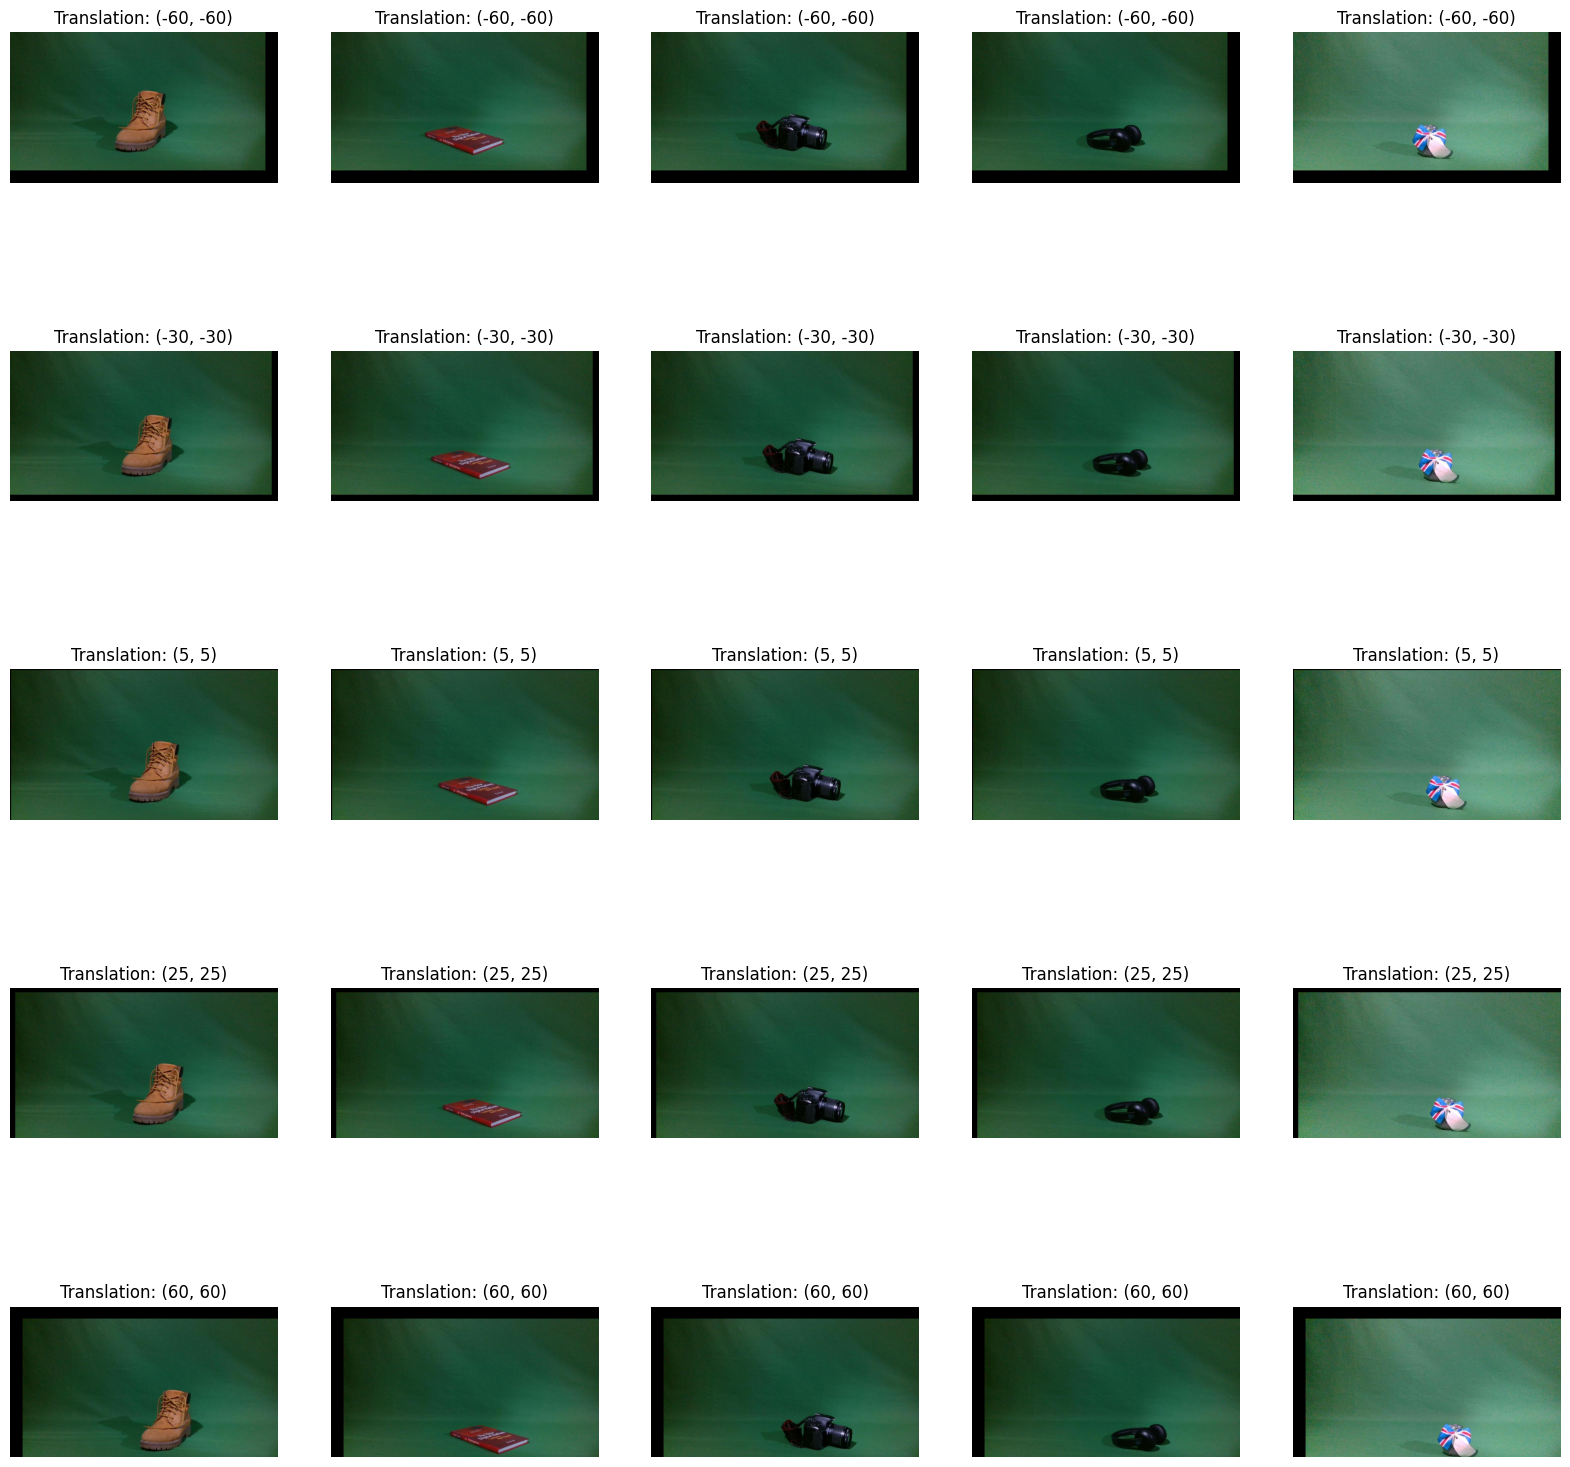

In [ ]:
# Ensure the 'translation' directory exists
os.makedirs('translation', exist_ok=True)

# Define function to translate image using first principles
def translate_image(image, dx, dy):
    rows, cols, _ = image.shape
    translated_image = np.zeros_like(image)
    
    for i in range(rows):
        for j in range(cols):
            new_x = j + dx
            new_y = i + dy
            
            if 0 <= new_x < cols and 0 <= new_y < rows:
                translated_image[new_y, new_x] = image[i, j]
    
    return translated_image

# Translation offsets to apply
translations = [(-60, -60), (-30, -30), (5, 5), (25, 25), (60, 60)]

# Generate augmented images with translation
translated_images = []
for dx, dy in translations:
    for image_file, img in images:
        translated_img = translate_image(img, dx, dy)
        translated_images.append((image_file, translated_img))
        
        # Save the translated image
        output_filename = f'translation/translation_{dx}_{dy}_{image_file}'
        plt.imsave(output_filename, translated_img)

# Display the augmented images
fig, axes = plt.subplots(len(translations), len(images), figsize=(20, 20))

for i, (dx, dy) in enumerate(translations):
    for j, (image_file, img) in enumerate(images):
        ax = axes[i, j]
        ax.imshow(plt.imread(f'translation/translation_{dx}_{dy}_{image_file}'))
        ax.set_title(f"Translation: ({dx}, {dy})")
        ax.axis('off')

plt.show()

The code ensures that augmented photographs will be stored in a directory called "translation." Then, it defines the translate_image() function, which translates images based on the specified offsets using first principles of image processing. This function shifts each pixel of the image by the given displacement in the x and y directions. It calculates the new coordinates of each pixel after translation and assigns the pixel value to the corresponding location in the translated image. The translated image is returned by the function. Following this, a list of translation offsets ranging from (-60, -60) to (60, 60) pixels is established.

Next, a set of augmented images is generated for each image by applying translation to the images according to the specified list of offsets. These translated images are saved in the 'translation' directory. Finally, the augmented images are displayed in a grid format, showcasing the original images alongside their translated versions with different offsets.

The final adjustments to the translation offsets will determine the displacement of the photographs. Positive values shift the image to the right (in the x-direction) or downwards (in the y-direction), while negative values shift it to the left or upwards, respectively. A value of (0, 0) will leave the image unchanged. The magnitude of the offsets determines the extent of translation, with larger values resulting in more significant shifts.

<h1>Shearing:</h1>

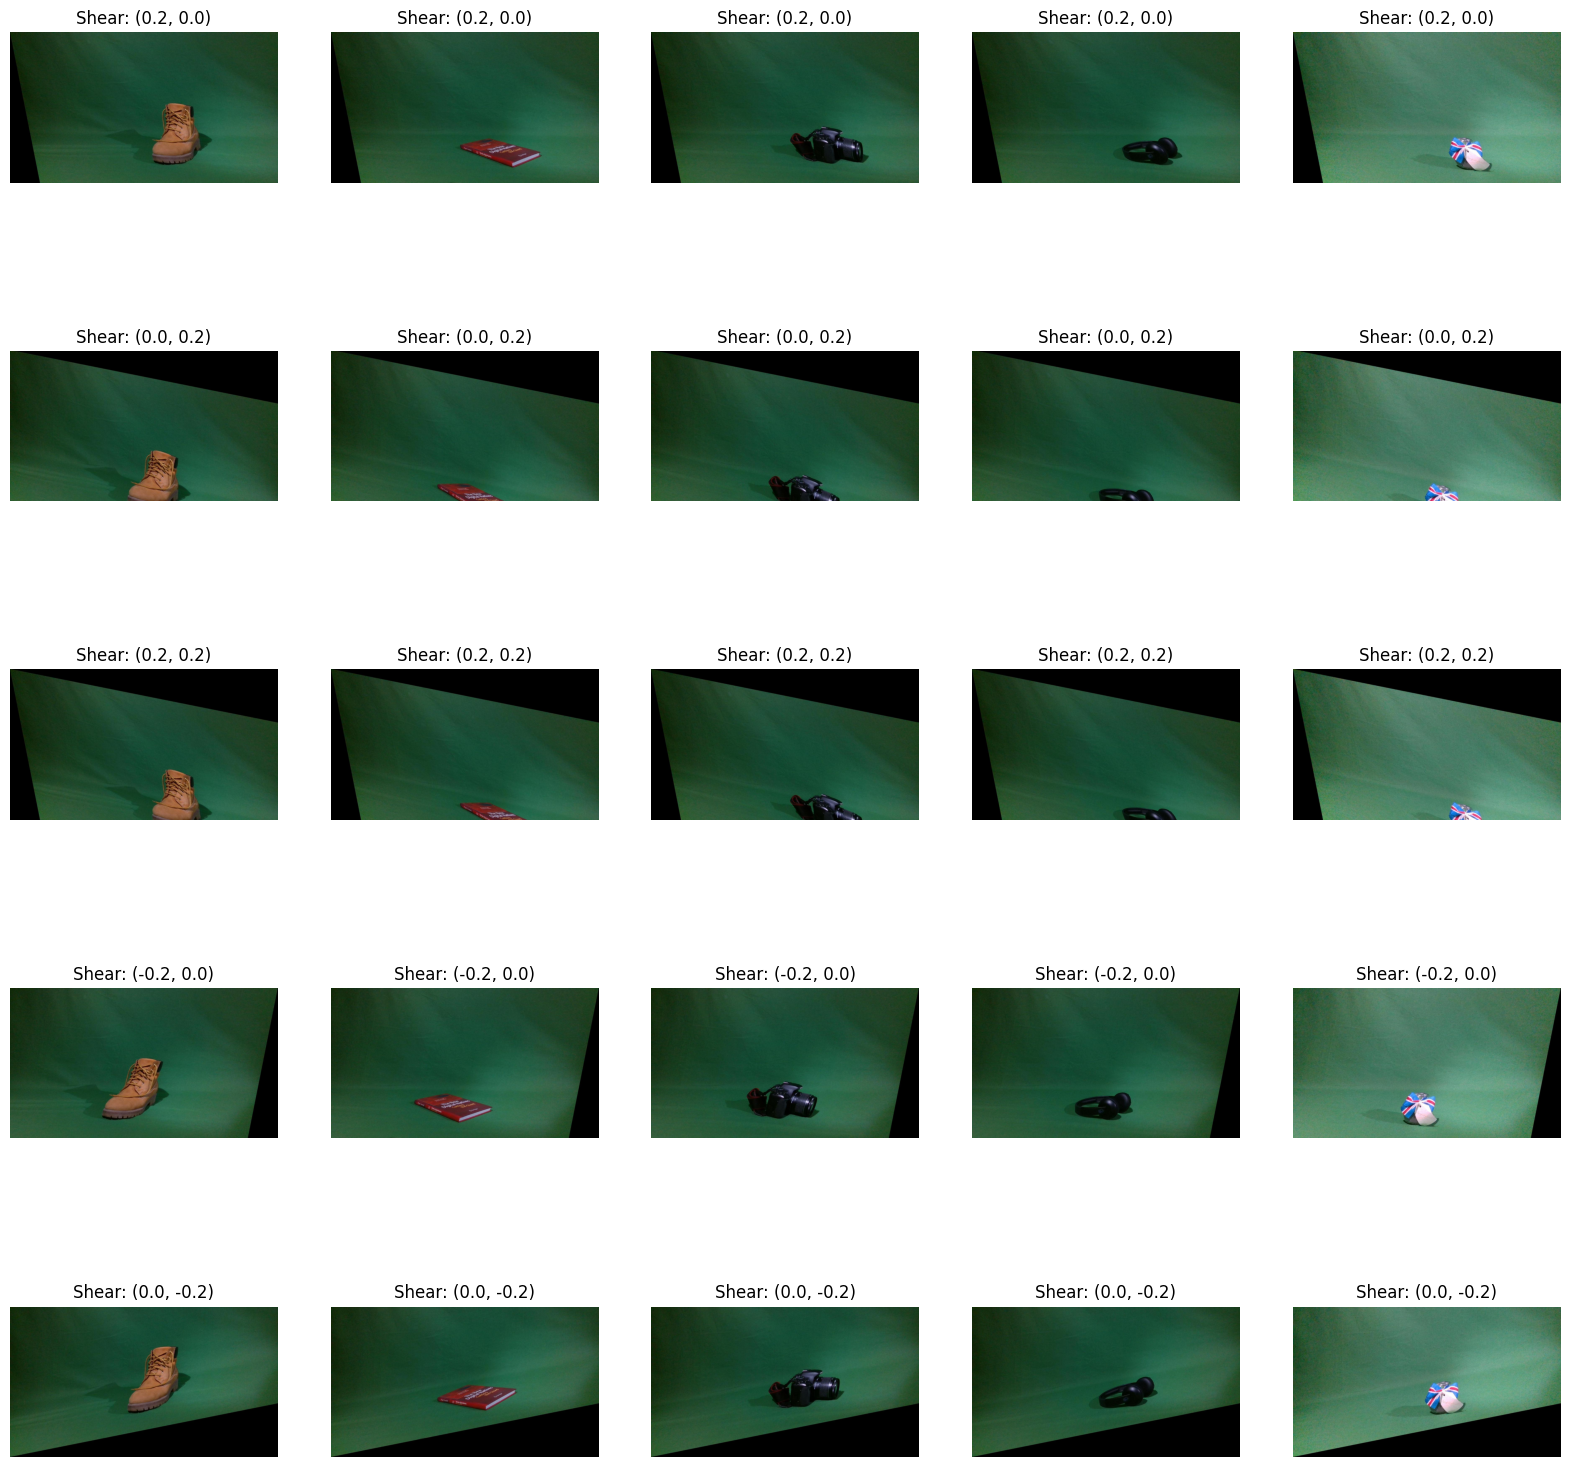

In [ ]:
# Ensure the 'shearing' directory exists
os.makedirs('shearing', exist_ok=True)

# Define function to shear image using first principles
def shear_image(image, shear_factor_x, shear_factor_y):
    rows, cols, _ = image.shape
    sheared_image = np.zeros_like(image)
    
    for i in range(rows):
        for j in range(cols):
            new_x = int(j + shear_factor_x * i)
            new_y = int(i + shear_factor_y * j)
            
            if 0 <= new_x < cols and 0 <= new_y < rows:
                sheared_image[new_y, new_x] = image[i, j]
    
    return sheared_image

# Shear factors to apply
shear_factors = [
    (0.2, 0.0),  # Shear only in x-direction
    (0.0, 0.2),  # Shear only in y-direction
    (0.2, 0.2),  # Shear in both directions
    (-0.2, 0.0), # Negative shear in x-direction
    (0.0, -0.2)  # Negative shear in y-direction
]

# Generate augmented images with shearing
sheared_images = []
for shear_factor_x, shear_factor_y in shear_factors:
    for image_file, img in images:
        sheared_img = shear_image(img, shear_factor_x, shear_factor_y)
        sheared_images.append((image_file, sheared_img))
        
        # Save the sheared image
        output_filename = f'shearing/shear_{shear_factor_x}_{shear_factor_y}_{image_file}'
        plt.imsave(output_filename, sheared_img)

# Display the augmented images
fig, axes = plt.subplots(len(shear_factors), len(images), figsize=(20, 20))

for i, (shear_factor_x, shear_factor_y) in enumerate(shear_factors):
    for j, (image_file, img) in enumerate(images):
        ax = axes[i, j]
        ax.imshow(plt.imread(f'shearing/shear_{shear_factor_x}_{shear_factor_y}_{image_file}'))
        ax.set_title(f"Shear: ({shear_factor_x}, {shear_factor_y})")
        ax.axis('off')

plt.show()

The code ensures that augmented photographs will be stored in a directory called "shearing." Then, it defines the shear_image() function, which applies shearing to images based on the specified shear factors using first principles of image processing. This function distorts each pixel of the image by shifting it along the x and y axes proportional to its y and x coordinates, respectively. It calculates the new coordinates of each pixel after shearing and assigns the pixel value to the corresponding location in the sheared image. The sheared image is returned by the function. Following this, a list of shear factors ranging from (0.2, 0.0) to (0.0, -0.2) is established.

Next, a set of augmented images is generated for each image by applying shearing to the images according to the specified list of shear factors. These sheared images are saved in the 'shearing' directory. Finally, the augmented images are displayed in a grid format, showcasing the original images alongside their sheared versions with different shear factors.

The final adjustments to the shear factors will determine the distortion of the photographs. Positive shear factors shear the image in the direction of the corresponding axis, while negative shear factors shear it in the opposite direction. A shear factor of (0, 0) will leave the image unchanged. The magnitude of the shear factors determines the extent of shearing, with larger values resulting in more significant distortions.